In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy

In [2]:
from py.utils import verifyDir

In [3]:
DATA_PATH = "data/PlacePulse_2/"

QSCORE_PATH = f"{DATA_PATH}/Qscores/all/Summaries/"

MAIN_OUT_PATH = "outputs/"

OUT_DETECT_PATH = f"{MAIN_OUT_PATH}segmentations/"

OUT_IMAGE_PATH = f"{MAIN_OUT_PATH}segmented_images/"

CACHE_PATH = f"{MAIN_OUT_PATH}/cache/"

In [4]:
verifyDir(CACHE_PATH)

### Drawing features presence

In [5]:
pp_df = pd.read_csv(f"{QSCORE_PATH}summary_safety.csv", low_memory=False)
pp_df.rename(columns={"ID": "image_file_name"}, inplace=True)
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111389 entries, 0 to 111388
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   image_file_name       111389 non-null  object 
 1   safety                111389 non-null  float64
 2   W_ratio_safety        111389 non-null  float64
 3   L_ratio_safety        111389 non-null  float64
 4   wins_safety           111389 non-null  int64  
 5   draws_safety          111389 non-null  int64  
 6   losses_safety         111389 non-null  int64  
 7   wins_against_safety   111389 non-null  object 
 8   loss_against_safety   111389 non-null  object 
 9   draws_against_safety  111389 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.5+ MB


In [6]:
segment_city_df = pd.read_csv(f"{MAIN_OUT_PATH}objects_deeplab_xception.csv", sep=";", low_memory=False)

In [7]:
df_ = segment_city_df.loc[:, (segment_city_df != 0).any(axis=0)].copy()
df_["city"] = df_["image_file_name"].apply(lambda x: x.split("_")[3])
df_["image_file_name"] = df_["image_file_name"].apply(lambda x: x.split("_")[2])
df_

,image_file_name,wall,building,sky,floor,tree,ceiling,road,bed,windowpane,...,crt,plate,monitor,bulletin,shower,radiator,glass,clock,flag,city
0,513cc058fdc9f0358700137e,0.000000,4.187520,43.906657,0.0,5.482992,0.0,28.821309,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston
1,513cc646fdc9f03587001930,0.000000,0.015767,31.339518,0.0,23.216248,0.0,34.255981,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston
2,513d35bffdc9f03587002b1e,0.000000,4.181417,42.042542,0.0,7.662964,0.0,25.940959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston
3,513cc072fdc9f0358700139b,0.000000,1.689148,43.962606,0.0,6.894430,0.0,24.218750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston
4,513cc0eafdc9f03587001413,0.000000,0.000000,48.340352,0.0,2.666219,0.0,37.083435,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110983,5140b899fdc9f04926001ca5,0.000000,0.699870,42.807007,0.0,10.089620,0.0,14.684041,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb
110984,5140b75efdc9f049260019a9,0.000000,5.694580,29.054769,0.0,14.404806,0.0,10.788472,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb
110985,5140b909fdc9f04926001d7d,0.348918,9.884135,34.589640,0.0,12.540181,0.0,16.451518,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb
110986,5140b8b6fdc9f04926001cdc,0.436910,20.867920,31.451925,0.0,9.117635,0.0,3.922526,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb


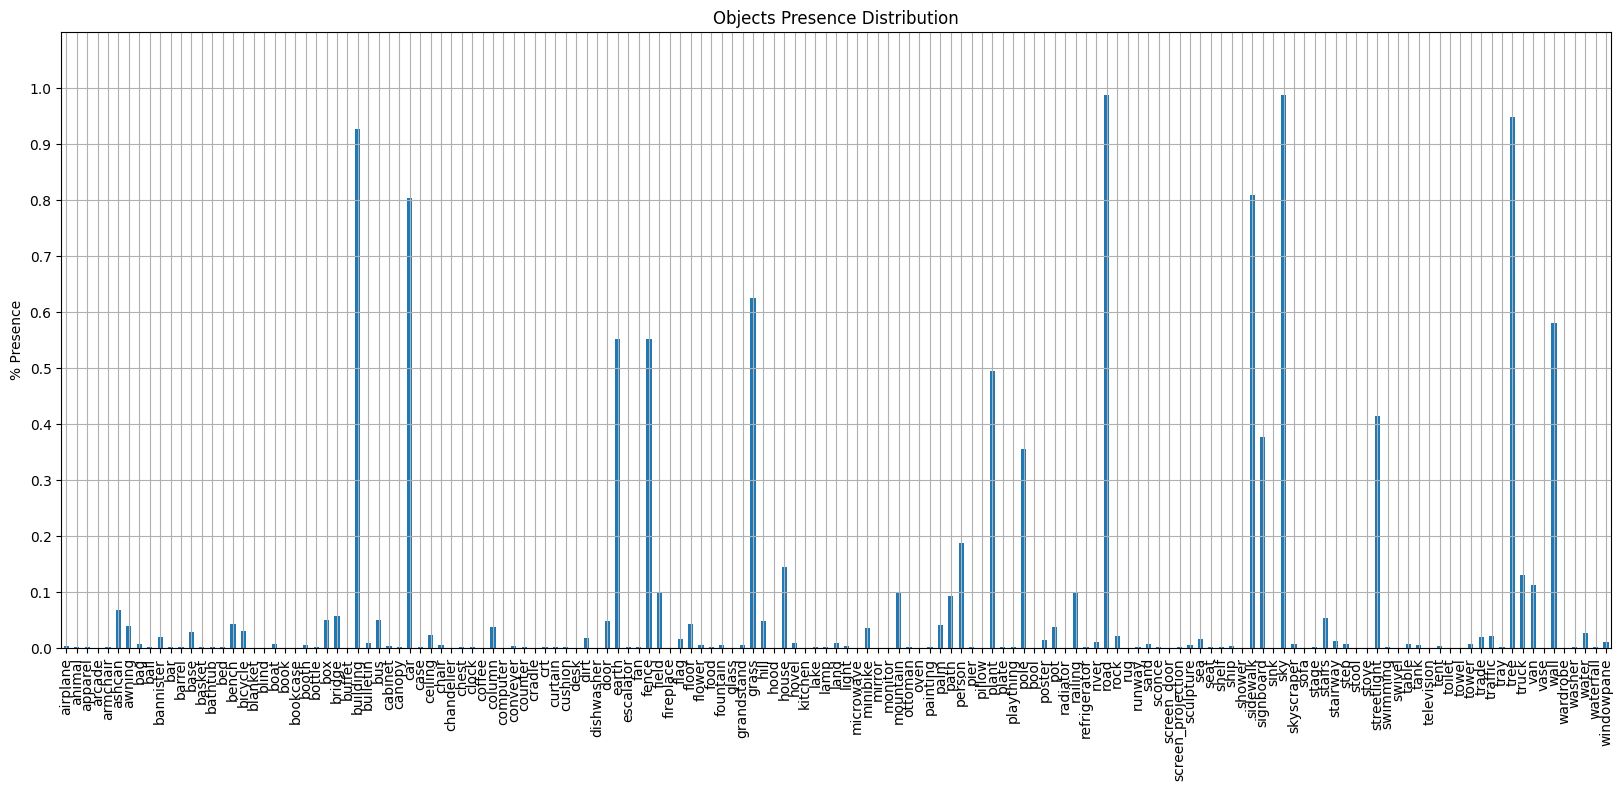

In [8]:
# Total
X_df = df_.iloc[:, 1:-1].copy()
X_df = X_df[np.sort(X_df.columns)]
X_df[X_df > 0] = 1

sum_df = X_df.sum()/len(X_df)

ax = sum_df.plot(kind="bar", figsize=(20,8), ylabel="% Presence", rot=90, ylim=(0.0,1.1), yticks=list(np.arange(0,1.1,0.10)))
plt.title(f"Objects Presence Distribution")
plt.grid(True)
plt.show()
# plt.savefig(f"{MAIN_OUT_PATH}objects_distribution.png", bbox_inches='tight', pad_inches = 0.5)
# plt.clf()
# plt.cla()
# plt.close()

### Generating samples 

In [9]:
data_df = pd.merge(df_, pp_df[["image_file_name", "safety"]], on="image_file_name", how="left")
data_df["labels"] = data_df["safety"].apply(lambda x: 1 if x>=5.0 else 0 )

In [10]:
new_columns = np.concatenate( (np.array(["image_file_name"]), np.sort(X_df.columns.values)) )
data_df.columns = np.concatenate( (new_columns, np.array(["city", "safety", "labels"])) )

In [11]:
data_df

,image_file_name,airplane,animal,apparel,arcade,armchair,ashcan,awning,bag,ball,...,vase,wall,wardrobe,washer,water,waterfall,windowpane,city,safety,labels
0,513cc058fdc9f0358700137e,0.000000,4.187520,43.906657,0.0,5.482992,0.0,28.821309,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston,2.520084,0
1,513cc646fdc9f03587001930,0.000000,0.015767,31.339518,0.0,23.216248,0.0,34.255981,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston,3.333333,0
2,513d35bffdc9f03587002b1e,0.000000,4.181417,42.042542,0.0,7.662964,0.0,25.940959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston,3.333333,0
3,513cc072fdc9f0358700139b,0.000000,1.689148,43.962606,0.0,6.894430,0.0,24.218750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston,5.634921,1
4,513cc0eafdc9f03587001413,0.000000,0.000000,48.340352,0.0,2.666219,0.0,37.083435,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston,4.811105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110983,5140b899fdc9f04926001ca5,0.000000,0.699870,42.807007,0.0,10.089620,0.0,14.684041,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,4.373219,0
110984,5140b75efdc9f049260019a9,0.000000,5.694580,29.054769,0.0,14.404806,0.0,10.788472,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,3.333333,0
110985,5140b909fdc9f04926001d7d,0.348918,9.884135,34.589640,0.0,12.540181,0.0,16.451518,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,5.017316,1
110986,5140b8b6fdc9f04926001cdc,0.436910,20.867920,31.451925,0.0,9.117635,0.0,3.922526,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,5.211386,1


In [12]:
city_df = data_df.iloc[:, -3].copy()
Y_df = data_df.iloc[:, -1].copy()
X_df = data_df.iloc[:, 1:-3].copy()
X_df.shape, Y_df.shape

((110988, 149), (110988,))

### Standard Scaler

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

### Classifiers

In [15]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [16]:
random_state = 42
regularizer_value = np.logspace(-3, 3, num=7)
class_weight = [None, 'balanced']
type_scaler = ['passthrough', scaler]
#dim_reductor = [t_svd, pca, sparse_pca]
type_penalty = ['l1', 'l2']

In [17]:
lr = LogisticRegression(
    tol=1e-3,
    dual=False,  # Prefer dual=False when n_samples > n_features
    random_state=random_state,
    max_iter=1e3,
)

param_lr = {}
param_lr['scaler'] = copy.deepcopy(type_scaler)
#param_lr['dim_reductor'] = copy.deepcopy(dim_reductor)
param_lr['classifier__C'] = copy.deepcopy(regularizer_value)
param_lr['classifier__class_weight'] = copy.deepcopy(class_weight)
param_lr['classifier__penalty'] = copy.deepcopy(type_penalty)
param_lr['classifier'] = [lr]

In [18]:
ridge = RidgeClassifier(
    tol=1e-3,
    random_state=random_state,
    max_iter=1e3,
)

param_ridge = {}
param_ridge['scaler'] = copy.deepcopy(type_scaler)
# param_ridge['dim_reductor'] = copy.deepcopy(dim_reductor)
param_ridge['classifier__alpha'] = copy.deepcopy(regularizer_value)
param_ridge['classifier__class_weight'] = copy.deepcopy(class_weight)
param_ridge['classifier'] = [ridge]

In [19]:
linear_svm = LinearSVC(
    tol=1e-3,
    random_state=42,
    max_iter=1e3,
)


param_linear_svm = {}
param_linear_svm['scaler'] = copy.deepcopy(type_scaler)
# param_linear_svm['dim_reductor'] = copy.deepcopy(dim_reductor)
param_linear_svm['classifier__C'] = copy.deepcopy(regularizer_value)
param_linear_svm['classifier__class_weight'] = copy.deepcopy(class_weight)
param_linear_svm['classifier__penalty'] = copy.deepcopy(type_penalty)
param_linear_svm['classifier'] = [linear_svm]

### Create Pipeline

In [20]:
from joblib import Memory

In [21]:
memory = Memory(
    location=CACHE_PATH,
    # verbose=1,
)

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
pipeline = Pipeline(
    steps = [
        # 1. Scaler
        ('scaler', scaler),
        # 3. Model selecction
        ('classifier', lr),
    ],
    memory=memory,
)

### Create GridSearch

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [25]:
param_grid = [param_lr, 
              param_ridge, 
              param_linear_svm]

In [26]:
grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring='balanced_accuracy',
            refit=True,
            cv=StratifiedKFold(n_splits=5),  # << Use time series
            verbose=4,
)

In [27]:
grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(memory=Memory(location=outputs//cache/joblib),
                                steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000.0,
                                                           random_state=42,
                                                           tol=0.001))]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000.0,
                                                            random_state=42,
                                                            tol=0.001)],
                          'clas...
                          'classifier__class_weight': [None, 'balanced'],
                          'scaler': ['passthrough', StandardScaler()]},
                         {'classifier': [LinearSVC(max_iter=1000.0,
                 

### Data Split

In [28]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(X_df, 
                                                Y_df, 
                                                train_size=0.8, 
                                                random_state=random_state,
                                                stratify=Y_df
                                               )
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(88790, 149) (88790,) (22198, 149) (22198,)


### Training

In [30]:
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, 

[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.624 total time=   0.3s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.625 total time=   0.3s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.619 total time=   0.3s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01,

[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.630 total time=   0.4s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.627 total time=   0.5s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.624 total time=   0.4s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.625 total time=   0.5s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier_

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.589 total time=   7.6s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.591 total time=   8.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.585 total time=   8.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.588 total time=   9.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.580 total time=   7.5s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.588 total time=   1.0s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.591 total time=   0.7s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.585 total time=   0.7s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.631 total time=   7.8s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.627 total time=   8.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.624 total time=   7.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.626 total time=   7.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.619 total time=   7.7s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.630 total time=   0.7s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.627 total time=   0.7s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.624 total time=   1.0s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, c

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.588 total time=   7.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.591 total time=   8.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.585 total time=   7.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.588 total time=   7.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.579 total time=   7.3s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.588 total time=   1.4s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.591 total time=   2.0s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.585 total time=   2.0s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.630 total time=   9.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.626 total time=   8.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.624 total time=   8.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.626 total time=   8.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.619 total time=   7.7s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.630 total time=   1.7s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.627 total time=   1.4s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.624 total time=   1.2s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, c

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.588 total time=   7.6s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.590 total time=   8.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.585 total time=   7.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.588 total time=   7.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.579 total time=   7.7s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.588 total time=   1.5s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.591 total time=   2.3s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.585 total time=   1.9s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.631 total time=   8.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.626 total time=   7.8s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.624 total time=   7.6s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.626 total time=   8.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.619 total time=   8.1s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.630 total time=   2.4s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.626 total time=   1.9s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.624 total time=   2.0s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.589 total time=   8.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.591 total time=   7.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.586 total time=   7.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.588 total time=   7.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.580 total time=   5.8s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.588 total time=   2.0s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.591 total time=   1.6s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.585 total time=   1.6s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classif

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.630 total time=   5.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.626 total time=   5.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.624 total time=   5.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.625 total time=   5.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.619 total time=   5.8s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.630 total time=   1.9s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.626 total time=   1.7s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.624 total time=   1.0s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.588 total time=   5.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.591 total time=   5.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.585 total time=   5.6s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.588 total time=   5.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.579 total time=   5.5s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.588 total time=   2.2s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.591 total time=   1.7s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.585 total time=   1.6s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, cl

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.631 total time=   5.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.627 total time=   5.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.624 total time=   5.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.626 total time=   6.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.619 total time=   6.3s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.630 total time=   2.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.626 total time=   1.6s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.624 total time=   3.0s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifi

[CV 3/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.01, classifier__class_weight=balanced, scaler=StandardScaler();, score=0.624 total time=   0.3s
[CV 4/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.01, classifier__class_weight=balanced, scaler=StandardScaler();, score=0.623 total time=   0.3s
[CV 5/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.01, classifier__class_weight=balanced, scaler=StandardScaler();, score=0.618 total time=   0.3s
[CV 1/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.1, classifier__class_weight=None, scaler=passthrough;, score=0.583 total time=   0.2s
[CV 2/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.1, classifier__class_weight=None, scaler=passthrough;, score=0.586 total time=   0.2s
[CV 3/5] END classifier=RidgeClassifier(max_iter=1000.0, random_s

[CV 3/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=10.0, classifier__class_weight=None, scaler=passthrough;, score=0.582 total time=   0.2s
[CV 4/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=10.0, classifier__class_weight=None, scaler=passthrough;, score=0.582 total time=   0.2s
[CV 5/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=10.0, classifier__class_weight=None, scaler=passthrough;, score=0.575 total time=   0.2s
[CV 1/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=10.0, classifier__class_weight=None, scaler=StandardScaler();, score=0.583 total time=   0.3s
[CV 2/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=10.0, classifier__class_weight=None, scaler=StandardScaler();, score=0.586 total time=   0.3s
[CV 3/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), class

[CV 2/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=1000.0, classifier__class_weight=None, scaler=StandardScaler();, score=0.585 total time=   0.3s
[CV 3/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=1000.0, classifier__class_weight=None, scaler=StandardScaler();, score=0.581 total time=   0.3s
[CV 4/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=1000.0, classifier__class_weight=None, scaler=StandardScaler();, score=0.580 total time=   0.3s
[CV 5/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=1000.0, classifier__class_weight=None, scaler=StandardScaler();, score=0.574 total time=   0.3s
[CV 1/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=1000.0, classifier__class_weight=balanced, scaler=passthrough;, score=0.629 total time=   0.2s
[CV 2/5] END classifier=RidgeClassifier(max_iter=1000.0,

[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanced, classifier__penalty=l1, scaler=StandardScaler();, score=nan total time=   0.2s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanced, classifier__penalty=l1, scaler=StandardScaler();, score=nan total time=   0.2s
[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanced, classifier__penalty=l1, scaler=StandardScaler();, score=nan total time=   0.2s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.630 total time=   0.9s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanced, classif

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.584 total time=   4.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.587 total time=   4.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.583 total time=   3.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.584 total time=   3.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.576 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.584 total time=  32.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.587 total time=  32.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.583 total time=  32.8s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.584 total time=  32.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.577 total time=  32.2s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l1, sc

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.630 total time=   4.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.627 total time=   4.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.625 total time=   3.8s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.624 total time=   4.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.617 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.630 total time=  32.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.627 total time=  32.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.624 total time=  32.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.624 total time=  32.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.617 total time=  32.5s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.593 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.562 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.612 total time=   3.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.616 total time=   4.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.544 total time=   4.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.584 total time=  32.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.588 total time=  32.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.584 total time=  32.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.584 total time=  32.6s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.577 total time=  32.4s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l1, scaler=

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.617 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.615 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.612 total time=   4.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.599 total time=   3.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.594 total time=   3.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.629 total time=  32.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.627 total time=  32.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.625 total time=  32.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.624 total time=  32.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.617 total time=  32.6s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.498 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.567 total time=   4.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.546 total time=   3.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.593 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.522 total time=   4.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.584 total time=  32.6s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.590 total time=  32.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.583 total time=  32.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.582 total time=  32.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.579 total time=  32.6s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.523 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.505 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.505 total time=   4.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.584 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.547 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.628 total time=  32.6s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.628 total time=  32.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.625 total time=  32.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.625 total time=  32.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.617 total time=  32.6s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthro

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.575 total time=   4.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.479 total time=   4.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.522 total time=   3.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.525 total time=   4.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.503 total time=   4.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.580 total time=  32.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.590 total time=  32.8s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.551 total time=  32.6s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.586 total time=  32.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.566 total time=  33.2s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l1, sc

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.531 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.480 total time=   3.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.522 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.525 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.497 total time=   4.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.612 total time=  32.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.620 total time=  32.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.610 total time=  32.6s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.608 total time=  32.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.610 total time=  33.0s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l1, scaler=pas

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.497 total time=   4.0s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.479 total time=   4.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.521 total time=   4.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.501 total time=   4.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.541 total time=   3.9s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.568 total time=  32.6s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.537 total time=  32.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.552 total time=  32.8s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.553 total time=  32.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.492 total time=  32.4s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.497 total time=   4.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.479 total time=   4.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.521 total time=   4.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.501 total time=   4.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.540 total time=   4.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.566 total time=  32.8s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.561 total time=  32.8s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.559 total time=  32.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.566 total time=  32.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.556 total time=  32.5s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l1, scale

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.497 total time=   4.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.479 total time=   4.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.521 total time=   4.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.501 total time=   4.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.540 total time=   4.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.523 total time=  32.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.458 total time=  32.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.545 total time=  32.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.548 total time=  32.6s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.510 total time=  32.5s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__pena

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.497 total time=   4.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.479 total time=   4.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.521 total time=   4.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.501 total time=   4.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.540 total time=   4.5s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.537 total time=  32.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.564 total time=  32.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.545 total time=  32.6s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.519 total time=  32.7s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
280 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/felipe/anaconda3/envs/segmentator/lib/pyt

[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.545 total time=  32.7s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(memory=Memory(location=outputs//cache/joblib),
                                steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(C=0.01,
                                                           class_weight='balanced',
                                                           max_iter=1000.0,
                                                           random_state=42,
                                                           tol=0.001))]),
             param_grid=[{'classifier': [LogisticRegression(C=0.01,
                                                            class_weigh...
                          'classifier__class_weight': [None, 'balanced'],
                          'scaler': ['passthrough', StandardScaler()]},
                         {'classifier': [LinearSVC(ma

### Results

In [31]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_scaler,param_classifier__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024593,0.001171,0.000000,0.000000,"LogisticRegression(C=0.01, class_weight='balan...",0.001,None,l1,passthrough,NaN,"{'classifier': LogisticRegression(C=0.01, clas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,140
1,0.131909,0.002266,0.000000,0.000000,"LogisticRegression(C=0.01, class_weight='balan...",0.001,None,l1,StandardScaler(),NaN,"{'classifier': LogisticRegression(C=0.01, clas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,101
2,1.776880,0.089801,0.005586,0.000265,"LogisticRegression(C=0.01, class_weight='balan...",0.001,None,l2,passthrough,NaN,"{'classifier': LogisticRegression(C=0.01, clas...",0.586672,0.589786,0.582981,0.584717,0.578312,0.584494,0.003829,50
3,0.339787,0.043023,0.017794,0.005520,"LogisticRegression(C=0.01, class_weight='balan...",0.001,None,l2,StandardScaler(),NaN,"{'classifier': LogisticRegression(C=0.01, clas...",0.581248,0.584693,0.581688,0.581406,0.573782,0.580564,0.003619,70
4,0.028517,0.012939,0.000000,0.000000,"LogisticRegression(C=0.01, class_weight='balan...",0.001,balanced,l1,passthrough,NaN,"{'classifier': LogisticRegression(C=0.01, clas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,32.473707,0.146930,0.009847,0.000302,"LinearSVC(max_iter=1000.0, random_state=42, to...",1000.0,None,l2,StandardScaler(),NaN,"{'classifier': LinearSVC(max_iter=1000.0, rand...",0.522579,0.457909,0.545202,0.547749,0.509614,0.516611,0.032611,79
136,0.053312,0.004374,0.000000,0.000000,"LinearSVC(max_iter=1000.0, random_state=42, to...",1000.0,balanced,l1,passthrough,NaN,"{'classifier': LinearSVC(max_iter=1000.0, rand...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,104
137,0.158543,0.001294,0.000000,0.000000,"LinearSVC(max_iter=1000.0, random_state=42, to...",1000.0,balanced,l1,StandardScaler(),NaN,"{'classifier': LinearSVC(max_iter=1000.0, rand...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,105
138,4.393230,0.108636,0.004696,0.000113,"LinearSVC(max_iter=1000.0, random_state=42, to...",1000.0,balanced,l2,passthrough,NaN,"{'classifier': LinearSVC(max_iter=1000.0, rand...",0.496793,0.479249,0.521176,0.500612,0.540064,0.507579,0.021012,83


In [32]:
grid_search.best_estimator_

Pipeline(memory=Memory(location=outputs//cache/joblib),
         steps=[('scaler', 'passthrough'),
                ('classifier',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000.0, random_state=42,
                                    tol=0.001))])

In [33]:
print(classification_report(
    ytest,
    grid_search.predict(xtest),
    digits=4,
))

              precision    recall  f1-score   support

           0     0.7169    0.6031    0.6551     13321
           1     0.5190    0.6426    0.5742      8877

    accuracy                         0.6189     22198
   macro avg     0.6179    0.6228    0.6146     22198
weighted avg     0.6377    0.6189    0.6227     22198



### Feature Importance

In [43]:
importance_classes = data_df.columns[1:-3]
importance_classes.values

array(['airplane', 'animal', 'apparel', 'arcade', 'armchair', 'ashcan',
       'awning', 'bag', 'ball', 'bannister', 'bar', 'barrel', 'base',
       'basket', 'bathtub', 'bed', 'bench', 'bicycle', 'blanket', 'blind',
       'boat', 'book', 'bookcase', 'booth', 'bottle', 'box', 'bridge',
       'buffet', 'building', 'bulletin', 'bus', 'cabinet', 'canopy',
       'car', 'case', 'ceiling', 'chair', 'chandelier', 'chest', 'clock',
       'coffee', 'column', 'computer', 'conveyer', 'counter', 'cradle',
       'crt', 'curtain', 'cushion', 'desk', 'dirt', 'dishwasher', 'door',
       'earth', 'escalator', 'fan', 'fence', 'field', 'fireplace', 'flag',
       'floor', 'flower', 'food', 'fountain', 'glass', 'grandstand',
       'grass', 'hill', 'hood', 'house', 'hovel', 'kitchen', 'lake',
       'lamp', 'land', 'light', 'microwave', 'minibike', 'mirror',
       'monitor', 'mountain', 'ottoman', 'oven', 'painting', 'palm',
       'path', 'person', 'pier', 'pillow', 'plant', 'plate', 'plaything',


In [35]:
importance = grid_search.best_estimator_._final_estimator.coef_[0]

In [45]:
feat_importances = pd.Series(importance)
feat_importances = feat_importances.reset_index().rename(columns={"index":"class", 0:"importance"}).copy()
feat_importances["class"] = importance_classes.values
feat_importances.set_index("class", inplace=True)
feat_importances.sort_values(by="importance", inplace=True, ascending=False)
feat_importances

,importance
class,
traffic,0.191532
flag,0.182346
minibike,0.114980
grass,0.114930
plant,0.114146
...,...
windowpane,-0.102848
stage,-0.109197
conveyer,-0.110825


<AxesSubplot:title={'center':'Feature Importance'}, ylabel='class'>

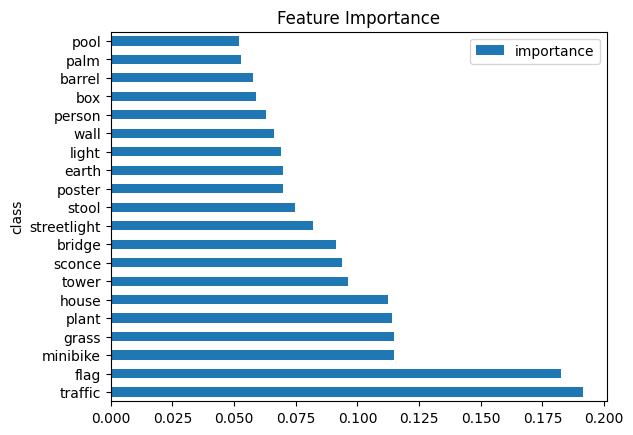

In [46]:
feat_importances.iloc[:20,:].plot(kind='barh',title = 'Feature Importance')

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='class'>

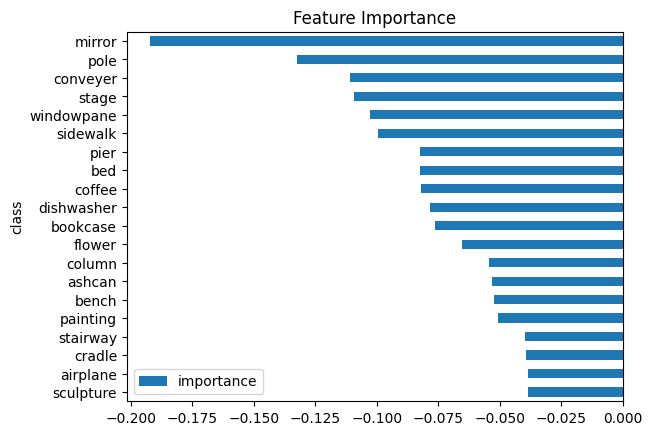

In [54]:
feat_importances.iloc[-20:,:].plot(kind='barh',title = 'Feature Importance')